In [17]:
import numpy as np
import matplotlib.pyplot as plt
import json

In [18]:
def divided_Diferences(points, predict_x):
    coefficients_matrix = np.zeros((len(points), len(points)+1))
    total = points[0][1]
    polinom = predict_x - points[0][0]
    for i in range(len(points)):
        coefficients_matrix[i][0] = points[i][0]
        coefficients_matrix[i][1] = points[i][1]
    for i in range(1, len(points)):
        for j in range(2, i+2):
            coefficients_matrix[i][j] = ( coefficients_matrix[i][j-1] - coefficients_matrix[i-1][j-1] ) / (coefficients_matrix[i][0] - coefficients_matrix[i-(j-1)][0])
    for i in range(1, (len(points))):
        total +=  coefficients_matrix[i, i+1]*polinom
        polinom *= (predict_x -  coefficients_matrix[i][0])
    return total 

In [19]:
def lagrange(points, predict_x):
    points = list(zip(*points))
    xpoints = points[0]
    ypoints = points[1]
    dividers = []
    results=[]
    dividers.append(xpoints[0]- xpoints[1])
    for i in range(2, len(xpoints)):
         dividers[0] *= xpoints[0] - xpoints[i]
    for i in range(1, len(xpoints)):
        dividers.append(xpoints[i]-xpoints[0])
        for j in range(1, len(xpoints)):
            dividers[i] *= (xpoints[i] - xpoints[j] )if i != j else 1
    numerator =  predict_x - xpoints[1]
    for i in range(2, len(xpoints)):
         numerator *= predict_x - xpoints[i]
    results.append(numerator * ypoints[i] / dividers[i])
    for i in range(1, len(xpoints)):
        numerator = predict_x - xpoints[0]
        for j in range(1, len(xpoints)):
            numerator *= (predict_x - xpoints[j]) if i != j else 1
        results.append(numerator * ypoints[i] / dividers[i])
    return sum(results)
        

In [20]:
def ranges_to_tuples(s: str):
    results = []
    s = s[3:]
    lines = s.split("\n")
    for line in lines:
        line = line[:-1]
        div = line.split(',')
        temp = div[0].split('<')
        elements = tuple(map(float, (temp[0], temp[-1], div[-1])))
        results.append(elements)
    return results

In [32]:
def pieces_interpolation(song, predictX, neighbourgs):
    for i in range(len(song)-1):
        if(predictX == song[i][0]):
            return [predictX,  song[i][1]]
        if song[i][0] < predictX and song[i+1][0] > predictX:
            return divided_Diferences( song[ max(0, i-neighbourgs + 1): min(i + neighbourgs, len(song)) ], predictX)
    return 10


In [99]:
f = open('songs2.txt', 'r')
songs = json.load(f)

Text(0.5, 1.0, 'Twinkle Twinkle little star')

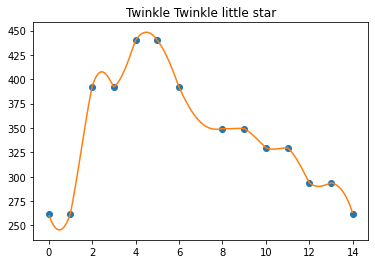

In [42]:
pointsx = []
pointsy = []
for i in range(500):
    pointsx.append(0 + 14*i/500)
    pointsy.append(pieces_interpolation(songs[0], pointsx[-1], 3))
coordinates = list(zip(*songs[0]))
plt.plot(coordinates[0], coordinates[1], 'o')
plt.plot(pointsx[1:],  pointsy[1:])
plt.title("Twinkle Twinkle little star")


Text(0.5, 1.0, 'Old Mcdonald')

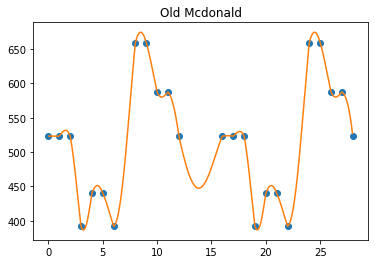

In [51]:
pointsx = []
pointsy = []
for i in range(999):
    pointsx.append(0 + 28*i/999)
    pointsy.append(pieces_interpolation(songs[1], pointsx[-1], 3))
coordinates = list(zip(*songs[1]))
plt.plot(coordinates[0], coordinates[1], 'o')
plt.plot(pointsx[1:],  pointsy[1:])
plt.title("Old Mcdonald")

Text(0.5, 1.0, 'Final Countdown')

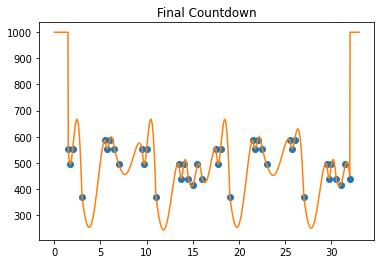

In [48]:
pointsx = []
pointsy = []
for i in range(999):
    pointsx.append(0 + 33*i/999)
    pointsy.append(pieces_interpolation(songs[2], pointsx[-1], 3))
coordinates = list(zip(*songs[2]))
plt.plot(coordinates[0], coordinates[1], 'o')
plt.plot(pointsx[1:],  pointsy[1:])
plt.title("Final Countdown")


In [153]:
from math import log2, pow
name = ["C", "C#", "D", "D#", "E", "F", "F#", "G", "G#", "A", "A#", "B"]
A4 = 440
C0 = A4*pow(2, -4.75)
def switcher(freq):
    h = round(12*log2(freq/C0))
    octave = h // 12
    n = h % 12
    if len(name[n])== 2:
        return name[n][0] + str(octave) + name[n][1]
    return name[n] + str(octave)

In [159]:
song = songs[2]
times = list(zip(*song))[0]
#times = [1, 2, 2.5, 3, 4, 5, 6, 7, 8,10,12, 13.5]
music = []
for i in times:
    music.append([i, switcher(pieces_interpolation(song, i, 3))])
player(music)

Playing C5# (554.37 Hz) for 0.125s
Playing B4 (493.88 Hz) for 0.125s
Playing C5# (554.37 Hz) for 0.5s
Playing F4# (369.99 Hz) for 1.25s
Playing D5 (587.33 Hz) for 0.125s
Playing C5# (554.37 Hz) for 0.125s
Playing D5 (587.33 Hz) for 0.25s
Playing C5# (554.37 Hz) for 0.25s
Playing B4 (493.88 Hz) for 1.25s
Playing C5# (554.37 Hz) for 0.125s
Playing B4 (493.88 Hz) for 0.125s
Playing C5# (554.37 Hz) for 0.5s
Playing F4# (369.99 Hz) for 1.25s
Playing B4 (493.88 Hz) for 0.125s
Playing A4 (440.00 Hz) for 0.125s
Playing B4 (493.88 Hz) for 0.25s
Playing A4 (440.00 Hz) for 0.25s
Playing G4# (415.30 Hz) for 0.25s
Playing B4 (493.88 Hz) for 0.25s
Playing A4 (440.00 Hz) for 0.75s
Playing C5# (554.37 Hz) for 0.125s
Playing B4 (493.88 Hz) for 0.125s
Playing C5# (554.37 Hz) for 0.5s
Playing F4# (369.99 Hz) for 1.25s
Playing D5 (587.33 Hz) for 0.125s
Playing C5# (554.37 Hz) for 0.125s
Playing D5 (587.33 Hz) for 0.25s
Playing C5# (554.37 Hz) for 0.25s
Playing B4 (493.88 Hz) for 1.25s
Playing D5 (587.33 H

In [158]:
def player(notes):
    player = musicalbeeps.Player(volume = 0.3,
                            mute_output = False)
    for i in range(len(notes)-1):
      player.play_note(notes[i][1], (notes[i+1][0] - notes[i][0]) / 2 )


In [149]:
import musicalbeeps
player = musicalbeeps.Player(volume = 0.3,
                            mute_output = False)

In [155]:
player.play_note("C5#", 1)

Playing C5# (554.37 Hz) for 1s


In [56]:
from pysine import sine

(0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0)

In [145]:
switcher(554.37)

'C#5'